Funds drawdown: cash balance remaining after monthly drawdown and interest payment

In [1]:
import logging
from datetime import datetime

import pandas as pd

from pytirement import draw_down_final, draw_down_table, scenario_plot

logging.basicConfig(level=logging.WARNING)

In [2]:
start_month = datetime(2025, 1, 1)  # Jan 2025
end_month = datetime(2044, 12, 1)  # Dec 2044

starting_balance = 2000000  # starting balance
annual_interest = 0.04  # annual rate, paid monthly
monthly_withdrawal = 7500  # estimate

In [3]:
out_df = draw_down_table(
    start_month, end_month, starting_balance, annual_interest, monthly_withdrawal
)

In [4]:
out_df

,Month,Months to go,Remaining funds,Month Label
0,1,238,1999141.67,2025-02-01
1,2,237,1998280.47,2025-03-01
2,3,236,1997416.41,2025-04-01
3,4,235,1996549.46,2025-05-01
4,5,234,1995679.63,2025-06-01
...,...,...,...,...
234,235,4,1694629.05,2044-08-01
235,236,3,1692752.81,2044-09-01
236,237,2,1690870.32,2044-10-01
237,238,1,1688981.55,2044-11-01


<Axes: xlabel='Month'>

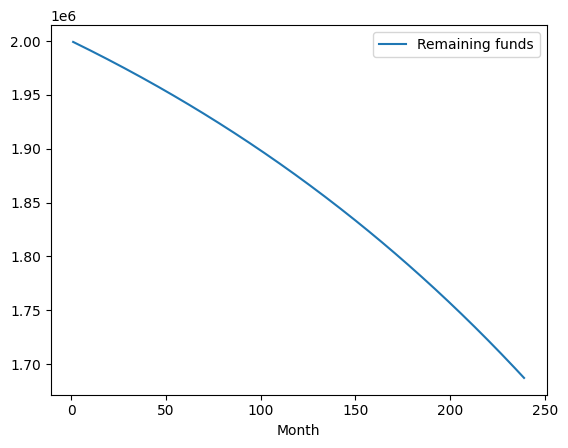

In [5]:
out_df.plot(x="Month", y="Remaining funds")

In [6]:
print("***Scenarios: funds remaining after end month***")

df = pd.DataFrame(
    {
        "4% rule": draw_down_final(
            start_month, end_month, starting_balance, 0.04, starting_balance * 0.04 / 12
        ),
        "Basic": draw_down_final(start_month, end_month, starting_balance, 0.04, 7500),
        "Increase draw": draw_down_final(
            start_month, end_month, starting_balance, 0.04, 8000
        ),
        "No interest": draw_down_final(
            start_month, end_month, starting_balance, 0, 7500
        ),
        "Reduced interest": draw_down_final(
            start_month, end_month, starting_balance, 0.03, 7500
        ),
        "Live large": draw_down_final(
            start_month, end_month, starting_balance, 0.04, 10000
        ),
    }
).T

df

***Scenarios: funds remaining after end month***


,start_year,start_month,end_year,end_month,start_balance,monthly_draw,annual_interest,remaining_funds
4% rule,2025.0,1.0,2044.0,12.0,2000000.0,6666.666667,0.04,1991898.68
Basic,2025.0,1.0,2044.0,12.0,2000000.0,7500.000000,0.04,1687086.49
Increase draw,2025.0,1.0,2044.0,12.0,2000000.0,8000.000000,0.04,1504199.18
No interest,2025.0,1.0,2044.0,12.0,2000000.0,7500.000000,0.00,207500.00
Reduced interest,2025.0,1.0,2044.0,12.0,2000000.0,7500.000000,0.03,1177663.93
Live large,2025.0,1.0,2044.0,12.0,2000000.0,10000.000000,0.04,772649.93


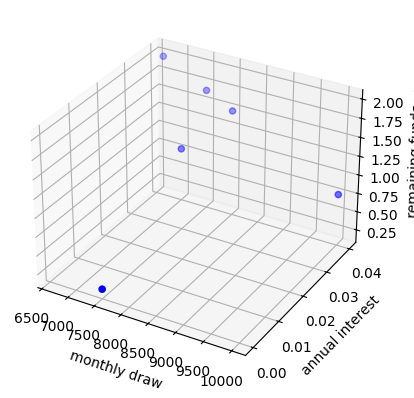

In [7]:
scenario_plot(df)